In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
arrival_df = pd.read_csv('data.csv')

In [37]:
arrival_df.describe()

,8:56 AM,9:00 AM,7:45 AM,7:45 AM.1,8:05 AM,7:45 AM.2
count,22,22,22,22,22,22
unique,8,11,14,15,17,12
top,8:45 AM,8:50 AM,9:00 AM,9:00 AM,8:50 AM,8:00 AM
freq,11,5,3,3,2,3


In [33]:
arrival_df.values[:2]

array([['8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM', '8:45 AM', '8:20 AM'],
       ['8:45 AM', '8:20 AM', '8:05 AM', '8:00 AM', '8:05 AM', '8:00 AM']],
      dtype=object)

In [38]:
flattened_df = arrival_df.values.reshape(-1)
flattened_df.shape

(132,)

In [39]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None
    

In [45]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in flattened_df]

In [47]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [48]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

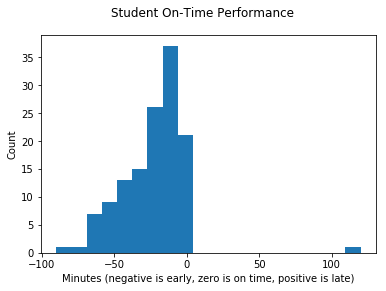

In [103]:
fig, ax = plt.subplots()
ax.hist(y,bins=20)  # Use the default number of bins
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


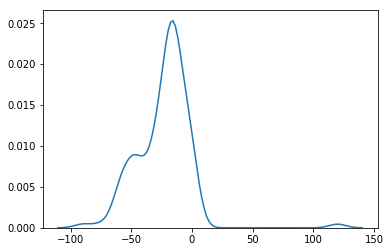

In [54]:
sns.kdeplot(y)

In [81]:
arrival_mean = np.mean(y)

In [102]:
np.median(y)

-20.0

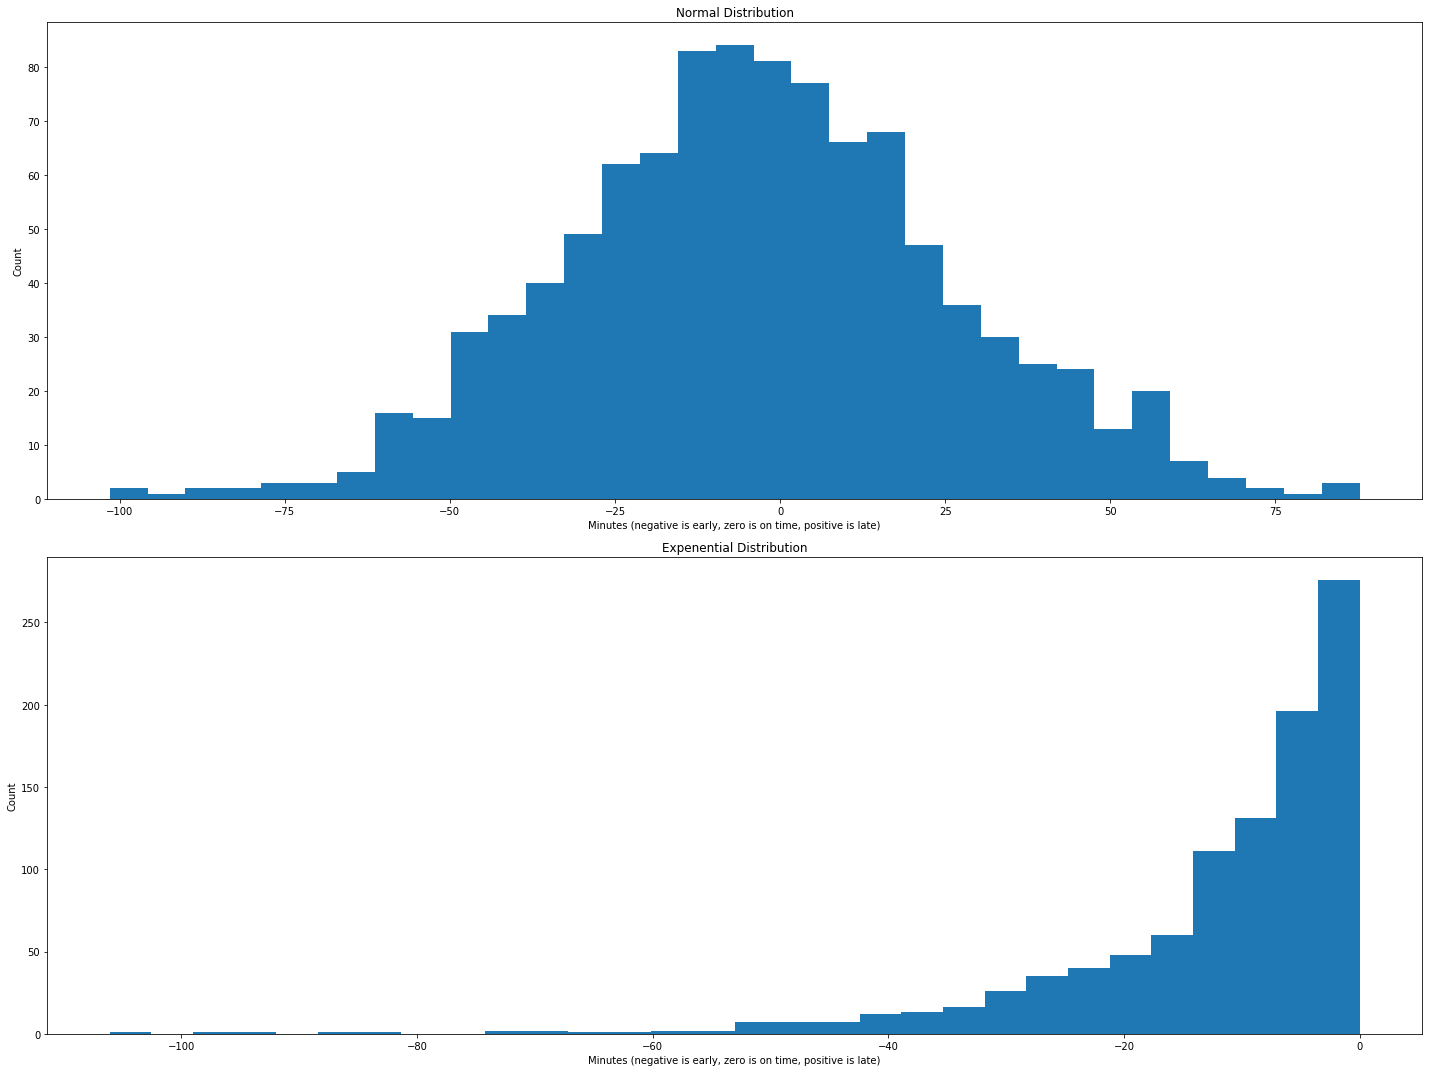

In [111]:
from scipy import stats

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Create some fake data with a normal distribution
normal_dist = stats.norm(loc=0, scale=30)
fake_y = normal_dist.rvs(1000)  

# Plot the data from the normal distribution
ax = axs[0]
ax.hist(fake_y, bins=33)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Normal Distribution")

# Create some fake data with an exponential distribution
exponential_dist = stats.expon(loc=0, scale=12)
fake_y = exponential_dist.rvs(1000)  

# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(-fake_y, bins=30)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Expenential Distribution")

# Show the plots
plt.tight_layout()
plt.show()